### Importing basic libraries


In [1]:
import pandas as pd
import sklearn.linear_model
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sn
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_boston
from collections import Counter
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import Perceptron

### Reading the data

In [2]:
df_titanic=pd.read_csv('Titanic.csv')
df_new=pd.read_csv('New.csv')

### Data Exploration

In [3]:
df_titanic


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df_titanic.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

(array([577.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 314.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

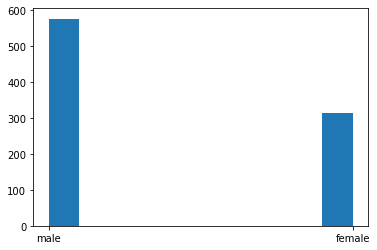

In [5]:
plt.hist(df_titanic['Sex'])

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

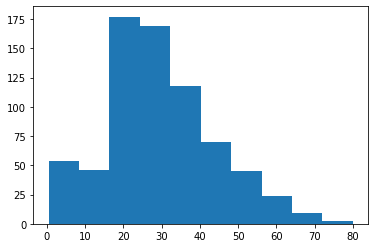

In [6]:
plt.hist(df_titanic['Age'])

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

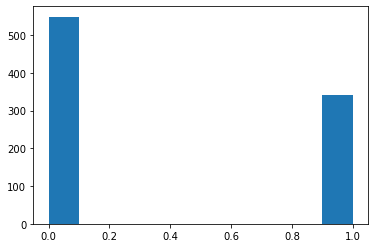

In [7]:
plt.hist(df_titanic['Survived'])

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

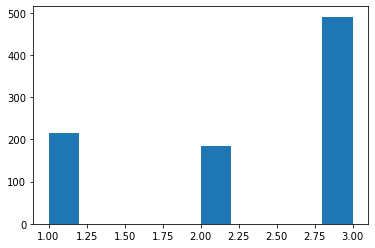

In [8]:
plt.hist(df_titanic['Pclass'])

### Data preprocessing for model deployment

In [9]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
df_titanic.replace({'Sex':{'male':1,'female':0},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)
df_titanic['Age'].fillna(df_titanic['Age'].mean(),inplace=True)
df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0], inplace=True)

In [11]:

df_titanic['Age'].isnull().sum()

0

In [12]:
df_titanic["Age"]=df_titanic.Age.round()

In [13]:
df_titanic.drop(columns = ['PassengerId','Name','Ticket','Cabin','Fare'],axis=1,inplace=True)

In [14]:
df_titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [15]:
df_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,0.0
1,1,1,0,38.0,1,0,1.0
2,1,3,0,26.0,0,0,0.0
3,1,1,0,35.0,1,0,0.0
4,0,3,1,35.0,0,0,0.0
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,0.0
887,1,1,0,19.0,0,0,0.0
888,0,3,0,30.0,1,2,0.0
889,1,1,1,26.0,0,0,1.0


### preprocessing for the test data

In [16]:
df_new.isnull().sum()


# In[125]:


df_new['Age'].fillna(df_new['Age'].mean(),inplace=True)
df_new['Fare'].fillna(df_new['Fare'].mean(),inplace=True)


# In[126]:


df_new.isnull().sum()


# In[127]:


df_new.drop(columns = ['PassengerId','Name','Ticket','Cabin','Fare'],axis=1,inplace=True)


# In[128]:



df_new.replace({'Sex':{'male':1,'female':0},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)
df_new

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,34.50000,0,0,2
1,3,0,47.00000,1,0,0
2,2,1,62.00000,0,0,2
3,3,1,27.00000,0,0,0
4,3,0,22.00000,1,1,0
...,...,...,...,...,...,...
413,3,1,30.27259,0,0,0
414,1,0,39.00000,0,0,1
415,3,1,38.50000,0,0,0
416,3,1,30.27259,0,0,0


### spliting the data 

In [17]:
train = pd.get_dummies(df_titanic)
X = train.drop(columns = ['Survived'],axis=1)
Y = train['Survived']


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)
print(Y_train.shape)
print(Y_test.shape)

(712,)
(179,)


In [19]:
print(X_train.shape)
print(X_test.shape)

(712, 6)
(179, 6)


# Model Deployment
### (K Nearest Neighbour)

In [20]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
prediction=knn.predict(X_test)

print(metrics.classification_report(Y_test,prediction))
print(metrics.confusion_matrix(Y_test,prediction))

              precision    recall  f1-score   support

           0       0.68      0.89      0.77       100
           1       0.77      0.47      0.58        79

    accuracy                           0.70       179
   macro avg       0.73      0.68      0.68       179
weighted avg       0.72      0.70      0.69       179

[[89 11]
 [42 37]]


In [21]:
X_train_prediction = knn.predict(X_train)
knn_training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
knn_test=accuracy_score(Y_test,prediction)
print('Accuracy score of training data :',knn_training_data_accuracy)

Accuracy score of training data : 0.8426966292134831


In [22]:
print('Accuracy score of test data : ', knn_test)

Accuracy score of test data :  0.7039106145251397


In [23]:
new_prediction=[]
pred = knn.predict(df_new)
prediction=pred.tolist()
for x in range(len(prediction)):
    if prediction[x]==1:
        print ('alive')
        new_prediction.append('alive')
    if prediction[x]==0:
        print('dead')
        new_prediction.append('dead')

dead
dead
dead
dead
dead
alive
alive
dead
dead
dead
dead
dead
alive
dead
dead
alive
dead
dead
dead
dead
dead
alive
alive
dead
alive
dead
alive
dead
alive
dead
dead
dead
alive
dead
alive
dead
dead
dead
dead
dead
dead
dead
dead
alive
alive
dead
dead
dead
dead
alive
dead
dead
dead
dead
dead
dead
dead
dead
dead
alive
dead
alive
dead
dead
alive
dead
alive
dead
dead
alive
dead
dead
dead
dead
alive
alive
dead
dead
dead
dead
alive
dead
alive
dead
dead
dead
dead
dead
alive
alive
dead
dead
dead
dead
alive
dead
dead
dead
dead
dead
alive
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
alive
alive
dead
dead
dead
dead
alive
alive
alive
alive
dead
alive
dead
dead
dead
dead
alive
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
alive
dead
dead
alive
dead
dead
dead
dead
dead
alive
dead
dead
alive
dead
dead
alive
dead
alive
alive
alive
alive
alive
dead
dead
dead
alive
dead
alive
dead
dead
alive
dead
dead
dead
alive
dead
dead
alive
dead
dead
alive
alive
dead
alive
dead
alive
dead
dead
d

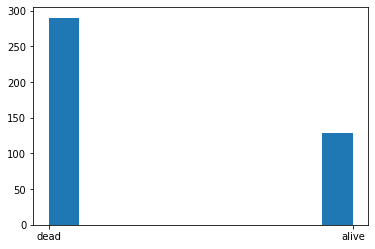

In [24]:
plt.hist(new_prediction) 
plt.show() 

In [25]:
print(Counter(new_prediction))

Counter({'dead': 290, 'alive': 128})


### Naive bayes


In [26]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)



GaussianNB()

In [27]:
 
acc_gaussian =gaussian.score(X_train, Y_train) 


print('Accuracy score of training data : ',acc_gaussian)


Accuracy score of training data :  0.7921348314606742


In [28]:
X_test_prediction = gaussian.predict(X_test)
test_nb_accuracy = accuracy_score(X_test_prediction,Y_test)
print('Accuracy score of test data : ', test_nb_accuracy)


Accuracy score of test data :  0.770949720670391


In [29]:
new_prediction=[]
pred = gaussian.predict(df_new)
prediction=pred.tolist()
for x in range(len(prediction)):
    if prediction[x]==1:
        print ('alive')
        new_prediction.append('alive')
    if prediction[x]==0:
        print('dead')
        new_prediction.append('dead')

dead
alive
dead
dead
alive
dead
alive
dead
alive
dead
dead
dead
alive
dead
alive
alive
dead
dead
alive
alive
dead
dead
alive
alive
alive
dead
alive
dead
dead
dead
dead
dead
alive
alive
dead
dead
alive
alive
dead
dead
dead
dead
dead
alive
alive
dead
dead
dead
alive
alive
dead
dead
alive
dead
dead
dead
dead
dead
dead
alive
dead
dead
dead
alive
dead
alive
alive
dead
alive
alive
alive
dead
alive
alive
alive
dead
dead
alive
dead
alive
dead
dead
dead
dead
dead
dead
alive
alive
alive
dead
alive
dead
alive
dead
alive
dead
alive
dead
alive
dead
alive
dead
dead
dead
alive
dead
dead
dead
dead
dead
dead
alive
alive
alive
alive
dead
dead
alive
dead
alive
alive
dead
alive
dead
dead
alive
dead
alive
dead
dead
dead
alive
alive
dead
dead
dead
dead
dead
alive
dead
dead
alive
alive
dead
dead
dead
dead
dead
dead
dead
alive
dead
dead
alive
dead
dead
alive
alive
dead
alive
alive
dead
alive
dead
dead
alive
dead
dead
alive
alive
dead
dead
dead
dead
dead
alive
alive
dead
alive
alive
dead
alive
alive
dead
alive

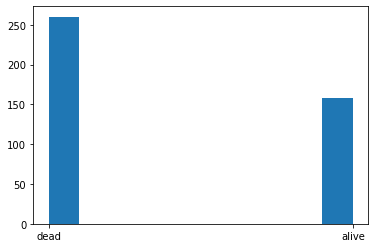

In [30]:
plt.hist(new_prediction) 
plt.show() 

In [31]:
print(Counter(new_prediction))

Counter({'dead': 260, 'alive': 158})


### decision tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  

acc_decision_tree = decision_tree.score(X_train, Y_train) 

In [33]:
print('the accuracy of training data is :',acc_decision_tree)

the accuracy of training data is : 0.9396067415730337


In [34]:
test= decision_tree.score(X_test,Y_test)

In [35]:
print('the accuracy of test data is :' ,test)

the accuracy of test data is : 0.7541899441340782


In [36]:
new_prediction=[]
pred = decision_tree.predict(df_new)
prediction=pred.tolist()
for x in range(len(prediction)):
    if prediction[x]==1:
        print ('alive')
        new_prediction.append('alive')
    if prediction[x]==0:
        print('dead')
        new_prediction.append('dead')


dead
dead
alive
alive
alive
dead
alive
dead
dead
alive
dead
dead
alive
alive
alive
alive
dead
dead
dead
dead
dead
alive
alive
dead
alive
dead
alive
dead
dead
dead
dead
dead
alive
dead
dead
dead
dead
alive
dead
dead
dead
dead
dead
alive
alive
dead
dead
dead
alive
alive
alive
dead
alive
dead
dead
dead
dead
dead
dead
alive
dead
alive
dead
alive
alive
alive
dead
dead
alive
alive
alive
dead
dead
dead
alive
alive
dead
alive
dead
alive
alive
dead
alive
dead
dead
dead
alive
dead
alive
alive
dead
dead
dead
dead
alive
dead
alive
dead
dead
dead
alive
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
alive
alive
dead
alive
dead
dead
alive
dead
alive
alive
dead
alive
dead
dead
alive
dead
alive
dead
dead
alive
dead
dead
dead
dead
dead
alive
dead
alive
dead
dead
alive
dead
dead
dead
dead
dead
dead
dead
dead
alive
dead
dead
alive
dead
dead
alive
alive
dead
alive
alive
alive
dead
dead
dead
alive
alive
dead
alive
dead
dead
dead
dead
dead
dead
alive
alive
dead
alive
alive
dead
dead
alive
dead
alive
dead


In [37]:
print(Counter(new_prediction))

Counter({'dead': 262, 'alive': 156})


(array([262.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 156.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

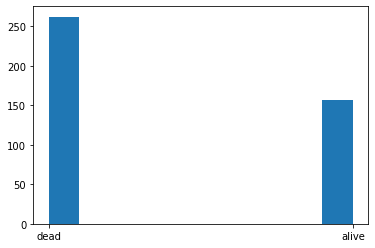

In [38]:
plt.hist(new_prediction)

### logistic regression

In [39]:
model=LogisticRegression()
model.fit(X_train, Y_train)
X_train_prediction = model.predict(X_train)
l_training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', l_training_data_accuracy)

Accuracy score of training data :  0.8103932584269663


In [40]:
X_test_prediction = model.predict(X_test)
logistic_regression_test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', logistic_regression_test_data_accuracy)

Accuracy score of test data :  0.7877094972067039


In [41]:
new_prediction=[]
pred = model.predict(df_new)
prediction=pred.tolist()
for x in range(len(prediction)):
    if prediction[x]==1:
        print ('alive')
        new_prediction.append('alive')
    if prediction[x]==0:
        print('dead')
        new_prediction.append('dead')


dead
dead
dead
dead
alive
dead
alive
dead
alive
dead
dead
dead
alive
dead
alive
alive
dead
dead
dead
dead
dead
dead
alive
alive
alive
dead
alive
dead
dead
dead
dead
dead
dead
dead
dead
dead
alive
alive
dead
dead
dead
dead
dead
alive
alive
dead
dead
dead
alive
dead
dead
dead
alive
alive
dead
dead
dead
dead
dead
alive
dead
dead
dead
alive
alive
alive
alive
dead
alive
alive
alive
dead
alive
alive
alive
alive
dead
alive
dead
alive
dead
dead
dead
dead
dead
dead
alive
alive
alive
dead
alive
dead
alive
dead
alive
dead
alive
dead
alive
dead
alive
dead
dead
dead
alive
dead
dead
dead
dead
dead
dead
alive
alive
alive
alive
dead
dead
alive
dead
alive
alive
dead
alive
dead
dead
alive
dead
dead
dead
dead
dead
dead
alive
dead
dead
dead
dead
dead
alive
dead
dead
alive
dead
dead
dead
dead
dead
dead
dead
dead
alive
dead
dead
dead
dead
dead
alive
alive
dead
alive
alive
dead
alive
dead
dead
alive
dead
dead
alive
alive
dead
dead
dead
dead
dead
alive
alive
dead
alive
alive
dead
dead
alive
dead
alive
dead
al

In [42]:
print(Counter(new_prediction))

Counter({'dead': 272, 'alive': 146})


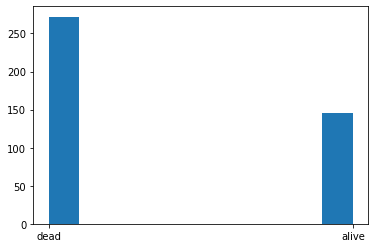

In [43]:
plt.hist(new_prediction) 
plt.show() 

### perceptron

In [44]:

perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron =perceptron.score(X_train, Y_train) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [45]:
X_train_prediction = perceptron.predict(X_train)
perceptron_training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', perceptron_training_data_accuracy)

Accuracy score of training data :  0.6896067415730337


In [46]:
X_test_prediction =perceptron.predict(X_test)
perceptron_test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ',perceptron_test_data_accuracy)

Accuracy score of test data :  0.6145251396648045


In [47]:
new_prediction=[]
pred =perceptron.predict(df_new)
prediction=pred.tolist()
for x in range(len(prediction)):
    if prediction[x]==1:
        print ('alive')
        new_prediction.append('alive')
    if prediction[x]==0:
        print('dead')
        new_prediction.append('dead')

dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
alive
dead
alive
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
alive
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
alive
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
alive
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
alive
dead
dead
dead
dead
dead
dead
alive
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
alive
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
alive
dead
dead
dead
dead
dead
dead
alive
dead
dead
alive
alive
dead
dead
dead
dead
alive
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
dead
alive
d

In [48]:
print(Counter(new_prediction))

Counter({'dead': 382, 'alive': 36})


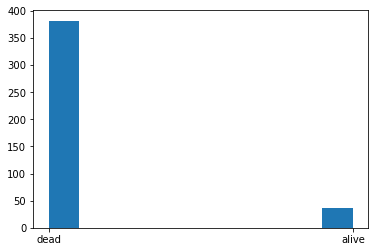

In [49]:
plt.hist(new_prediction) 
plt.show() 

### linear SVC


In [50]:

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = linear_svc.score(X_train, Y_train) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [51]:
X_train_prediction = linear_svc.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8216292134831461


In [52]:
X_test_prediction =linear_svc.predict(X_test)
svm_test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ',svm_test_data_accuracy)

Accuracy score of test data :  0.776536312849162


In [53]:
new_prediction=[]
pred =linear_svc.predict(df_new)
prediction=pred.tolist()
for x in range(len(prediction)):
    if prediction[x]==1:
        print ('alive')
        new_prediction.append('alive')
    if prediction[x]==0:
        print('dead')
        new_prediction.append('dead')


dead
dead
dead
dead
alive
dead
alive
dead
alive
dead
dead
dead
alive
dead
alive
alive
dead
dead
dead
dead
dead
dead
alive
alive
alive
dead
alive
dead
dead
dead
dead
dead
dead
dead
dead
dead
alive
alive
dead
dead
dead
dead
dead
alive
alive
dead
dead
dead
alive
alive
dead
dead
alive
alive
dead
dead
dead
dead
dead
alive
dead
dead
dead
alive
alive
alive
alive
dead
dead
alive
alive
dead
alive
dead
alive
dead
dead
alive
dead
alive
dead
dead
dead
dead
dead
dead
alive
alive
alive
dead
alive
dead
alive
dead
alive
dead
dead
dead
alive
dead
alive
dead
dead
dead
alive
dead
dead
dead
dead
dead
dead
alive
alive
alive
alive
dead
dead
alive
dead
alive
alive
dead
alive
dead
dead
alive
dead
dead
dead
dead
dead
dead
alive
dead
dead
dead
dead
dead
alive
dead
dead
alive
dead
dead
dead
dead
dead
dead
dead
dead
alive
dead
dead
alive
dead
dead
alive
alive
dead
alive
alive
dead
alive
dead
dead
dead
dead
dead
alive
alive
dead
dead
dead
dead
dead
alive
alive
dead
alive
alive
dead
dead
alive
dead
alive
dead
alive

In [54]:
print(new_prediction)

['dead', 'dead', 'dead', 'dead', 'alive', 'dead', 'alive', 'dead', 'alive', 'dead', 'dead', 'dead', 'alive', 'dead', 'alive', 'alive', 'dead', 'dead', 'dead', 'dead', 'dead', 'dead', 'alive', 'alive', 'alive', 'dead', 'alive', 'dead', 'dead', 'dead', 'dead', 'dead', 'dead', 'dead', 'dead', 'dead', 'alive', 'alive', 'dead', 'dead', 'dead', 'dead', 'dead', 'alive', 'alive', 'dead', 'dead', 'dead', 'alive', 'alive', 'dead', 'dead', 'alive', 'alive', 'dead', 'dead', 'dead', 'dead', 'dead', 'alive', 'dead', 'dead', 'dead', 'alive', 'alive', 'alive', 'alive', 'dead', 'dead', 'alive', 'alive', 'dead', 'alive', 'dead', 'alive', 'dead', 'dead', 'alive', 'dead', 'alive', 'dead', 'dead', 'dead', 'dead', 'dead', 'dead', 'alive', 'alive', 'alive', 'dead', 'alive', 'dead', 'alive', 'dead', 'alive', 'dead', 'dead', 'dead', 'alive', 'dead', 'alive', 'dead', 'dead', 'dead', 'alive', 'dead', 'dead', 'dead', 'dead', 'dead', 'dead', 'alive', 'alive', 'alive', 'alive', 'dead', 'dead', 'alive', 'dead', 'ali

In [55]:
print(Counter(new_prediction))

Counter({'dead': 278, 'alive': 140})


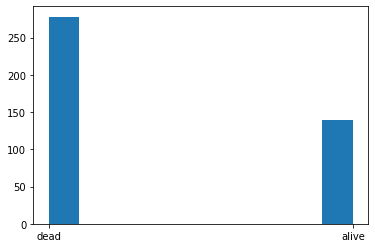

In [56]:
plt.hist(new_prediction) 
plt.show() 

In [57]:
results = pd.DataFrame({
    'Model': ['svm', 'KNN', 'Logistic Regression', 'Perceptron','naive baise','decision tree'],
    'Score': [svm_test_data_accuracy,knn_test,
              logistic_regression_test_data_accuracy,perceptron_test_data_accuracy,test_nb_accuracy,test
              ]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df


,Model
Score,
0.787709,Logistic Regression
0.776536,svm
0.770950,naive baise
0.754190,decision tree
0.703911,KNN
0.614525,Perceptron
